 <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>



In [1]:
import pandas as pd
import numpy as np

## 시계열 처리

In [2]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01',
                         '2020-02-01', '2020-02-02',
                         '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [3]:
s['2020-01-01': ]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [4]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [5]:
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조



|타임스탬프(timestamp)|기간(time period)|시간 델타 또는 지속시간|
|:--:|:--:|:--:|
|Pandas```Timestamp```타입 제공|Pandas```Period```타입 제공|Pandas의 ```Timedelta```타입 제공|
|파이썬 ```datetime```대체 타입||파이썬 ```datetime.timedelta```대체 타입|
|```numpy.datetime64``` 타입 기반|```numpy.datetime64```타입 기반|```numpy.timedelta64```타입 기반|
|```DatetimeIndex```인덱스 구조|```PeriodIndex```인덱스 구조|```TimedeltaIndex```인덱스 구조|

In [6]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), 
                        '2nd of Feb, 2020', '2020-Mar-4', '20200701'])

# 다양한 표현들을 표준으로 변형하게 됨
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [7]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [8]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [9]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [10]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [12]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [13]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

Nat : Not a time

In [14]:
idx[2]

NaT

In [15]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [16]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), 
         datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020, 1, 11),
         datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [17]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01    1.343018
2020-01-02    0.949997
2020-01-04    0.315802
2020-01-07    0.012772
2020-01-10    1.470289
2020-01-11    1.457806
2020-01-15    0.559636
dtype: float64

In [18]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [19]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [20]:
ts[ts.index[2]]

0.3158018825426392

In [21]:
ts['20200104']

0.3158018825426392

In [22]:
ts['1/4/2020']

0.3158018825426392

In [23]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01    2.737573
2017-10-02   -0.858384
2017-10-03   -1.506842
2017-10-04    0.218340
2017-10-05    0.885695
                ...   
2020-06-22   -1.200956
2020-06-23   -0.109153
2020-06-24    0.091351
2020-06-25   -0.059162
2020-06-26    0.621169
Freq: D, Length: 1000, dtype: float64

인덱싱이 년, 월, 일 로 가능하다.

In [24]:
ts['2020']

2020-01-01   -1.088390
2020-01-02    1.126893
2020-01-03   -0.166299
2020-01-04    0.698929
2020-01-05    0.340894
                ...   
2020-06-22   -1.200956
2020-06-23   -0.109153
2020-06-24    0.091351
2020-06-25   -0.059162
2020-06-26    0.621169
Freq: D, Length: 178, dtype: float64

In [25]:
ts['2020-06']

2020-06-01    1.021049
2020-06-02   -1.018637
2020-06-03   -1.024626
2020-06-04    0.486700
2020-06-05    0.335440
2020-06-06    1.775214
2020-06-07    1.159148
2020-06-08    2.043387
2020-06-09   -1.026153
2020-06-10   -0.423276
2020-06-11    0.440369
2020-06-12    1.230760
2020-06-13    0.568061
2020-06-14   -1.518597
2020-06-15    0.371219
2020-06-16    1.630851
2020-06-17   -1.997465
2020-06-18   -0.653717
2020-06-19    1.060089
2020-06-20    0.076579
2020-06-21    1.246014
2020-06-22   -1.200956
2020-06-23   -0.109153
2020-06-24    0.091351
2020-06-25   -0.059162
2020-06-26    0.621169
Freq: D, dtype: float64

In [26]:
ts[datetime(2020, 6, 20):]

2020-06-20    0.076579
2020-06-21    1.246014
2020-06-22   -1.200956
2020-06-23   -0.109153
2020-06-24    0.091351
2020-06-25   -0.059162
2020-06-26    0.621169
Freq: D, dtype: float64

In [27]:
ts['2020-06-10' : '2020-06-20']

2020-06-10   -0.423276
2020-06-11    0.440369
2020-06-12    1.230760
2020-06-13    0.568061
2020-06-14   -1.518597
2020-06-15    0.371219
2020-06-16    1.630851
2020-06-17   -1.997465
2020-06-18   -0.653717
2020-06-19    1.060089
2020-06-20    0.076579
Freq: D, dtype: float64

In [28]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                   index= pd.date_range('2017-10-01', periods=1000),
                   columns=['A', 'B', 'C', 'D'])
tdf

,A,B,C,D
2017-10-01,0.233091,0.097763,1.769597,-0.156734
2017-10-02,-0.017688,0.953651,0.744746,0.681634
2017-10-03,-0.441141,-1.327903,-2.771942,0.040854
2017-10-04,-0.320372,1.036217,0.428953,-0.407163
2017-10-05,0.780701,-4.329508,-0.083838,0.159946
...,...,...,...,...
2020-06-22,0.709721,0.666368,0.122013,0.313966
2020-06-23,-1.202393,-0.779199,-1.335237,0.607774
2020-06-24,0.077298,-0.538629,0.193499,-1.747274
2020-06-25,0.120883,0.550117,0.591141,0.223106


In [29]:
tdf['2020']

,A,B,C,D
2020-01-01,-0.428998,-2.163504,-0.258324,0.475672
2020-01-02,-0.609363,1.087265,0.013197,-0.009385
2020-01-03,-1.107658,-1.301092,1.705246,1.222993
2020-01-04,1.251370,-0.229097,-0.022593,2.424351
2020-01-05,-0.057196,-1.234107,-0.139671,-0.656105
...,...,...,...,...
2020-06-22,0.709721,0.666368,0.122013,0.313966
2020-06-23,-1.202393,-0.779199,-1.335237,0.607774
2020-06-24,0.077298,-0.538629,0.193499,-1.747274
2020-06-25,0.120883,0.550117,0.591141,0.223106


In [30]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,0.169672,-0.707398,0.106769,-1.262812
2020-06-02,0.280650,-0.334775,-0.063182,0.333988
2020-06-03,0.826153,-0.833433,-0.865731,-0.270370
2020-06-04,-0.124130,0.337146,-0.837725,-1.226190
2020-06-05,0.207364,-0.532133,-2.443354,-0.385552
2020-06-06,-0.181376,-0.415236,0.510779,-1.266919
2020-06-07,-0.533788,1.126072,0.017664,-1.979901
2020-06-08,-0.505474,-0.129960,-1.502507,0.265838
2020-06-09,0.454415,-0.736266,0.991846,-0.799974
2020-06-10,0.706949,-1.211856,1.009532,-0.842777


In [31]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-0.679184,0.821750,-0.561130,-0.403877
2020-06-21,0.711449,1.205311,-1.858419,1.964651
2020-06-22,0.709721,0.666368,0.122013,0.313966
2020-06-23,-1.202393,-0.779199,-1.335237,0.607774
2020-06-24,0.077298,-0.538629,0.193499,-1.747274
2020-06-25,0.120883,0.550117,0.591141,0.223106
2020-06-26,0.796178,-1.824254,-0.471331,-0.741288


In [32]:
tdf['C']

2017-10-01    1.769597
2017-10-02    0.744746
2017-10-03   -2.771942
2017-10-04    0.428953
2017-10-05   -0.083838
                ...   
2020-06-22    0.122013
2020-06-23   -1.335237
2020-06-24    0.193499
2020-06-25    0.591141
2020-06-26   -0.471331
Freq: D, Name: C, Length: 1000, dtype: float64

In [33]:
ts = pd.Series(np.random.randn(10), 
               index=pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', 
                                       '2020-01-02', '2020-01-03','2020-01-04',
                                       '2020-01-05', '2020-01-05', '2020-01-06',
                                       '2020-01-07']))
ts

2020-01-01   -1.058118
2020-01-01   -1.060419
2020-01-02   -0.296494
2020-01-02   -1.542263
2020-01-03    1.013284
2020-01-04   -0.583638
2020-01-05    0.808388
2020-01-05    1.036602
2020-01-06    1.160192
2020-01-07   -1.767503
dtype: float64

In [34]:
ts.index.is_unique

False

In [35]:
ts['2020-01-01']

2020-01-01   -1.058118
2020-01-01   -1.060419
dtype: float64

In [36]:
# 인덱스가 중복 되므로 평균값으로 이용
ts.groupby(level=0).mean()

2020-01-01   -1.059268
2020-01-02   -0.919379
2020-01-03    1.013284
2020-01-04   -0.583638
2020-01-05    0.922495
2020-01-06    1.160192
2020-01-07   -1.767503
dtype: float64

In [37]:
pd.date_range('2020-01-01', '2020-07-01')


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [38]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [40]:
# B 는 Business day

pd.date_range('2020-07-01', '2020-07-07', freq='B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋


- 주기코드

|코드|오프셋|설명|
|:-|:-|:-|
|```D```|Day|달력상 일|
|```B```|BusinessDay|영업일|
|```W-MON```, ```WTUE```,...|Week|주|
|```WON-MON```, ```WON-2MON```,...|Week of Month|월별 주차와 요일|
|```MS```|MonthBegin|월 시작일|
|```BMS```|BusinessMonthBegin|영업일 기준 월 시작일|
|```M```|MonthEnd|월 마지막일|
|```BM```|BusinessMonthEnd|영업일 기준 월 마지막일|
|```QS-JAN```, ```GS-FEB```,...|QuarterBegin|분기 시작|
|```BQS-JAN```, ```BQS-FEB```,...|BusinessQuarterBegin|영업일 기준 분기 시작|
|```Q-JAN```, ```Q-FEB```,...|QuarterEnd|분기 마지막|
|```BQ-JAN```, ```BQ- FEB```, ...|BusinessQuarterEnd|영업일 기준 분기 마지막|
|```AS-JAN```, ```AS-FEB```,...|YearBegin|연초|
|```BAS-JAN```, ```BAS-FEB```, ...|BusinessYearBegin|영업일 기준 연초|
|```A-JAN```, ```A-FEB```,...|YearEnd|연말|
|```BA-JAN```, ```BA-FEB```,...|BusinessYearEnd|영업일 기준 연말|
|```H```|Hour|시간|
|```BH```|BusinessHour|영업 시간|
|```T``` 또는 ```min```|Minute|분|
|```S```|Second|초|

In [41]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [42]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [43]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [44]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [45]:
pd.date_range('2020-01-01', periods=30, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [46]:
pd.date_range('2020-01-01', periods=30, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [47]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))

ts

2020-01-01    0.238991
2020-01-02   -0.451030
2020-01-03   -0.223321
2020-01-06   -0.287084
2020-01-07   -0.087845
Freq: B, dtype: float64

In [48]:
ts.shift(1)

2020-01-01         NaN
2020-01-02    0.238991
2020-01-03   -0.451030
2020-01-06   -0.223321
2020-01-07   -0.287084
Freq: B, dtype: float64

In [49]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.238991
2020-01-07   -0.451030
Freq: B, dtype: float64

In [50]:
ts.shift(-2)

2020-01-01   -0.223321
2020-01-02   -0.287084
2020-01-03   -0.087845
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [51]:
ts.shift(3, freq='B')

2020-01-06    0.238991
2020-01-07   -0.451030
2020-01-08   -0.223321
2020-01-09   -0.287084
2020-01-10   -0.087845
Freq: B, dtype: float64

In [52]:
ts.shift(2, freq='W')

2020-01-12    0.238991
2020-01-12   -0.451030
2020-01-12   -0.223321
2020-01-19   -0.287084
2020-01-19   -0.087845
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [53]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [54]:
tz = pytz.timezone('Asia/Seoul')

In [55]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
dinx

DatetimeIndex(['2020-01-01 09:00:00', '2020-01-02 09:00:00',
               '2020-01-03 09:00:00', '2020-01-06 09:00:00',
               '2020-01-07 09:00:00', '2020-01-08 09:00:00',
               '2020-01-09 09:00:00'],
              dtype='datetime64[ns]', freq='B')

In [56]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [57]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00   -0.060363
2020-01-02 09:00:00+00:00    1.423021
2020-01-03 09:00:00+00:00    1.380469
2020-01-06 09:00:00+00:00   -0.327470
2020-01-07 09:00:00+00:00    0.884017
2020-01-08 09:00:00+00:00    1.794851
2020-01-09 09:00:00+00:00    0.151658
Freq: B, dtype: float64

In [58]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [59]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -0.060363
2020-01-02 18:00:00+09:00    1.423021
2020-01-03 18:00:00+09:00    1.380469
2020-01-06 18:00:00+09:00   -0.327470
2020-01-07 18:00:00+09:00    0.884017
2020-01-08 18:00:00+09:00    1.794851
2020-01-09 18:00:00+09:00    0.151658
Freq: B, dtype: float64

In [60]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00   -0.060363
2020-01-02 09:00:00+09:00    1.423021
2020-01-03 09:00:00+09:00    1.380469
2020-01-06 09:00:00+09:00   -0.327470
2020-01-07 09:00:00+09:00    0.884017
2020-01-08 09:00:00+09:00    1.794851
2020-01-09 09:00:00+09:00    0.151658
dtype: float64

In [61]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -0.060363
2020-01-02 00:00:00+00:00    1.423021
2020-01-03 00:00:00+00:00    1.380469
2020-01-06 00:00:00+00:00   -0.327470
2020-01-07 00:00:00+00:00    0.884017
2020-01-08 00:00:00+00:00    1.794851
2020-01-09 00:00:00+00:00    0.151658
dtype: float64

In [62]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00   -0.060363
2020-01-02 01:00:00+01:00    1.423021
2020-01-03 01:00:00+01:00    1.380469
2020-01-06 01:00:00+01:00   -0.327470
2020-01-07 01:00:00+01:00    0.884017
2020-01-08 01:00:00+01:00    1.794851
2020-01-09 01:00:00+01:00    0.151658
dtype: float64

In [63]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [64]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [65]:
stamp_utc.value

1577880000000000000

In [66]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [67]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [68]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [69]:
stamp_utc.value

1577880000000000000

In [70]:
stamp_ny.value

1577898000000000000

In [71]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [72]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [73]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [74]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [75]:
ts_utc

2020-01-01 09:00:00+00:00   -0.060363
2020-01-02 09:00:00+00:00    1.423021
2020-01-03 09:00:00+00:00    1.380469
2020-01-06 09:00:00+00:00   -0.327470
2020-01-07 09:00:00+00:00    0.884017
2020-01-08 09:00:00+00:00    1.794851
2020-01-09 09:00:00+00:00    0.151658
Freq: B, dtype: float64

In [76]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [77]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [78]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [79]:
p + 2

Period('2022', 'A-JAN')

In [80]:
p - 3

Period('2017', 'A-JAN')

In [81]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [82]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [83]:
pd.Series(np.random.randn(6), index=pr)

2020-01    0.807536
2020-02   -1.121115
2020-03   -0.625511
2020-04   -0.867903
2020-05    0.950448
2020-06    0.044116
Freq: M, dtype: float64

In [84]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [85]:
p = pd.Period('2020', freq='A-FEB')
p 

Period('2020', 'A-FEB')

In [86]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [87]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [88]:
p = pd.Period('2020', freq='A-OCT')
p


Period('2020', 'A-OCT')

In [89]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [90]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [91]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010   -1.268861
2011   -0.538156
2012    0.388317
2013    0.300246
2014    0.660057
2015   -0.424252
2016    1.790718
2017   -0.216346
2018   -0.357350
2019    0.021667
2020    0.443109
Freq: A-JAN, dtype: float64

In [92]:
ts.asfreq('M', how='start')

2009-02   -1.268861
2010-02   -0.538156
2011-02    0.388317
2012-02    0.300246
2013-02    0.660057
2014-02   -0.424252
2015-02    1.790718
2016-02   -0.216346
2017-02   -0.357350
2018-02    0.021667
2019-02    0.443109
Freq: M, dtype: float64

In [93]:
ts.asfreq('B', how='end')

2010-01-29   -1.268861
2011-01-31   -0.538156
2012-01-31    0.388317
2013-01-31    0.300246
2014-01-31    0.660057
2015-01-30   -0.424252
2016-01-29    1.790718
2017-01-31   -0.216346
2018-01-31   -0.357350
2019-01-31    0.021667
2020-01-31    0.443109
Freq: B, dtype: float64

In [94]:
p = pd.Period('2020Q2', freq='Q-JAN')
p 

Period('2020Q2', 'Q-JAN')

In [95]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [96]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [97]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [98]:
pr = pd.date_range('2020-01-01',periods=5, freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2020-01-31    0
2020-04-30    1
2020-07-31    2
2020-10-31    3
2021-01-31    4
Freq: Q-JAN, dtype: int32

In [99]:
ts.to_period()

2020Q4    0
2021Q1    1
2021Q2    2
2021Q3    3
2021Q4    4
Freq: Q-JAN, dtype: int32

In [100]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01    0.185901
2020-01-02    0.080979
2020-01-03    0.825449
2020-01-04    0.448924
2020-01-05    0.263796
Freq: D, dtype: float64

In [101]:
p = ts.to_period('M')
p

2020-01    0.185901
2020-01    0.080979
2020-01    0.825449
2020-01    0.448924
2020-01    0.263796
Freq: M, dtype: float64

In [102]:
p.to_timestamp(how='start')

2020-01-01    0.185901
2020-01-01    0.080979
2020-01-01    0.825449
2020-01-01    0.448924
2020-01-01    0.263796
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

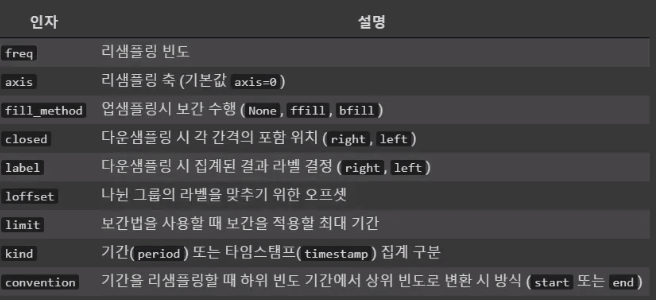

In [103]:
dr = pd.date_range('2020-01-01', periods=200, freq='D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01    0.869020
2020-01-02    1.482065
2020-01-03   -0.565183
2020-01-04    0.652609
2020-01-05   -0.246319
                ...   
2020-07-14    0.828398
2020-07-15   -1.149821
2020-07-16   -0.270178
2020-07-17    2.952204
2020-07-18   -1.793197
Freq: D, Length: 200, dtype: float64

In [104]:
ts.resample('M').mean()

2020-01-31   -0.223314
2020-02-29   -0.126758
2020-03-31   -0.543035
2020-04-30   -0.283679
2020-05-31    0.125191
2020-06-30   -0.148087
2020-07-31   -0.324332
Freq: M, dtype: float64

In [105]:
ts.resample('M', kind='period').mean()

2020-01   -0.223314
2020-02   -0.126758
2020-03   -0.543035
2020-04   -0.283679
2020-05    0.125191
2020-06   -0.148087
2020-07   -0.324332
Freq: M, dtype: float64

In [106]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int32

In [107]:
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int32

In [108]:
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int32

In [109]:
ts.resample('2T', closed='right', label='right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int32

In [110]:
ts.resample('2T', closed='right', label='right', loffset='-1s').sum()

<ipython-input-110-f09f275c4eda>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('2T', closed='right', label='right', loffset='-1s').sum()


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int32

In [111]:
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [112]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  index = pd.date_range('2019-10-01', periods=10, freq='M'),
                  columns=['C1','C2','C3','C4'])
df

,C1,C2,C3,C4
2019-10-31,-0.769112,-0.514908,-1.927857,0.018724
2019-11-30,0.030260,-0.044446,-1.425133,0.873148
2019-12-31,-1.443803,1.465372,-1.249251,-0.476584
2020-01-31,-0.870481,-0.125425,-0.481709,-0.462829
2020-02-29,2.821960,0.326853,-1.542319,-0.861775
2020-03-31,1.184124,-0.996142,-0.072452,-0.429997
2020-04-30,0.135503,-1.550437,-0.001134,-0.661460
2020-05-31,1.052598,-0.692617,-0.042852,-0.775734
2020-06-30,-2.273572,2.284717,1.519528,-1.866602
2020-07-31,-0.016431,0.685931,2.159697,-0.725191


In [113]:
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-1.443803,1.465372,-1.249251,-0.476584
2020-12-31,NaN,NaN,NaN,NaN


In [114]:
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [115]:
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [116]:
df.resample('H').ffill() # 앞에 값으로 채우기

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 01:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 02:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 03:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 04:00:00,-0.769112,-0.514908,-1.927857,0.018724
...,...,...,...,...
2020-07-30 20:00:00,-2.273572,2.284717,1.519528,-1.866602
2020-07-30 21:00:00,-2.273572,2.284717,1.519528,-1.866602
2020-07-30 22:00:00,-2.273572,2.284717,1.519528,-1.866602
2020-07-30 23:00:00,-2.273572,2.284717,1.519528,-1.866602


In [117]:
df.resample('H').ffill(limit=2)

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 01:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 02:00:00,-0.769112,-0.514908,-1.927857,0.018724
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [118]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.727552,0.302006,-1.534080,0.138429
2020-03-31,1.045201,-0.264905,-0.698826,-0.584867
2020-06-30,-0.361823,0.013888,0.491847,-1.101265
2020-09-30,-0.016431,0.685931,2.159697,-0.725191


In [119]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.727552,0.302006,-1.534080,0.138429
2020-12-31,0.290529,-0.009589,0.219823,-0.826227


### 무빙 윈도우(Moving Window)

In [120]:
df = pd.DataFrame(np.random.randn(300, 4), 
                  index=pd.date_range('2020-01-01', periods=300, freq='D'),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,-0.370397,-0.477412,-1.724726,-0.250678
2020-01-02,0.066038,0.981820,-0.332806,-0.883471
2020-01-03,-0.062684,0.691522,0.170739,-0.263331
2020-01-04,-0.383864,-0.271830,-1.857051,-0.722755
2020-01-05,0.018600,0.542119,0.416563,1.551570
...,...,...,...,...
2020-10-22,-0.791201,-1.733766,-1.168499,1.365157
2020-10-23,0.647002,0.204063,2.171622,0.739281
2020-10-24,0.290028,-0.903167,-0.135886,-0.637764
2020-10-25,-0.415757,0.625786,-0.727780,-0.955148


<AxesSubplot:>

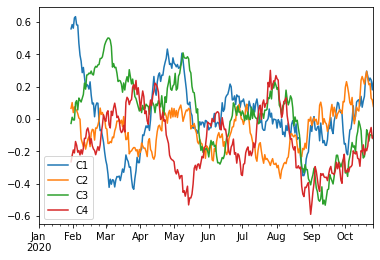

In [121]:
df.rolling(30).mean().plot()

<AxesSubplot:>

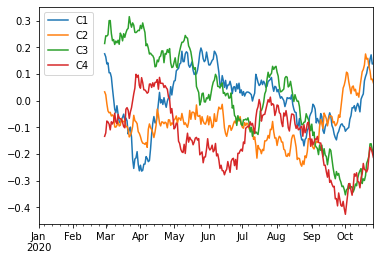

In [122]:
df.rolling(60).mean().plot()

<AxesSubplot:>

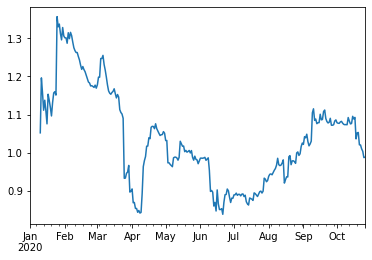

In [123]:
df.C1.rolling(60, min_periods=10).std().plot()

<AxesSubplot:>

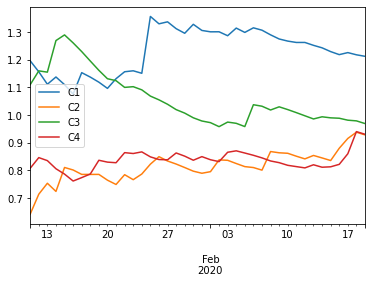

In [124]:
df.rolling(60, min_periods=10).std()[10:50].plot()

<AxesSubplot:>

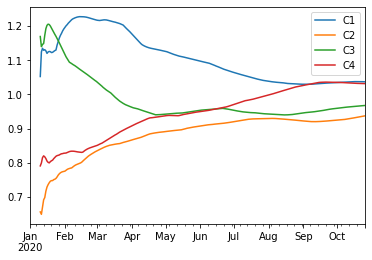

In [125]:
df.rolling(60, min_periods=10).std().expanding().mean().plot()

<AxesSubplot:>

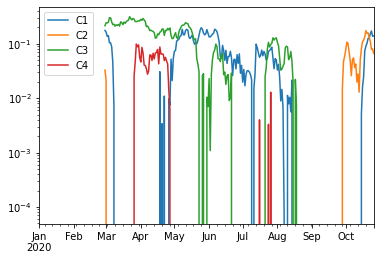

In [126]:
df.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

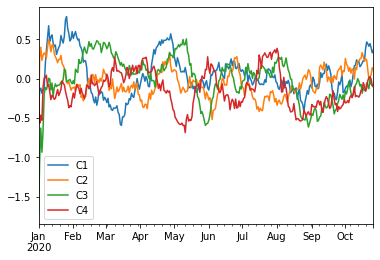

In [127]:
df.rolling('20D').mean().plot()

<AxesSubplot:>

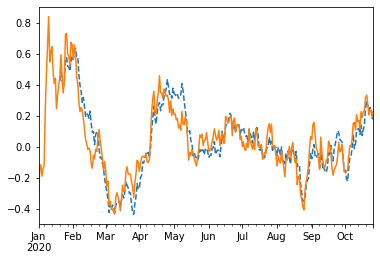

In [128]:
df.C1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-', label='EWMA')

<AxesSubplot:>

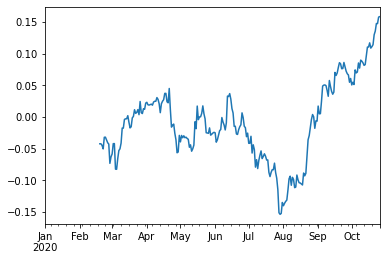

In [129]:
df.C1.rolling(100, min_periods=50).corr(df.C3).plot()

<AxesSubplot:>

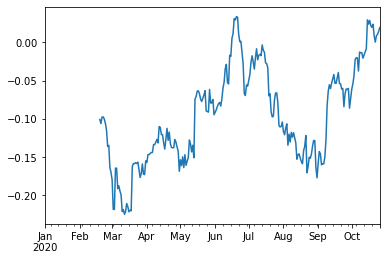

In [130]:
df.C1.rolling(100, min_periods=50).corr(df.C4).plot()

출처: 
* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


<br>


* [이수안컴퓨터연구소](https://www.youtube.com/channel/UCFfALXX0DOx7zv6VeR5U_Bg)
* https://github.com/minsuk-heo/pandas

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly